# LSTM  модель с механизмом внимания для генерации музыкальных последовательностей

In [1]:
from music21 import *
import glob

In [2]:
import music21

Партитура:

C:\Users\User\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2001 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


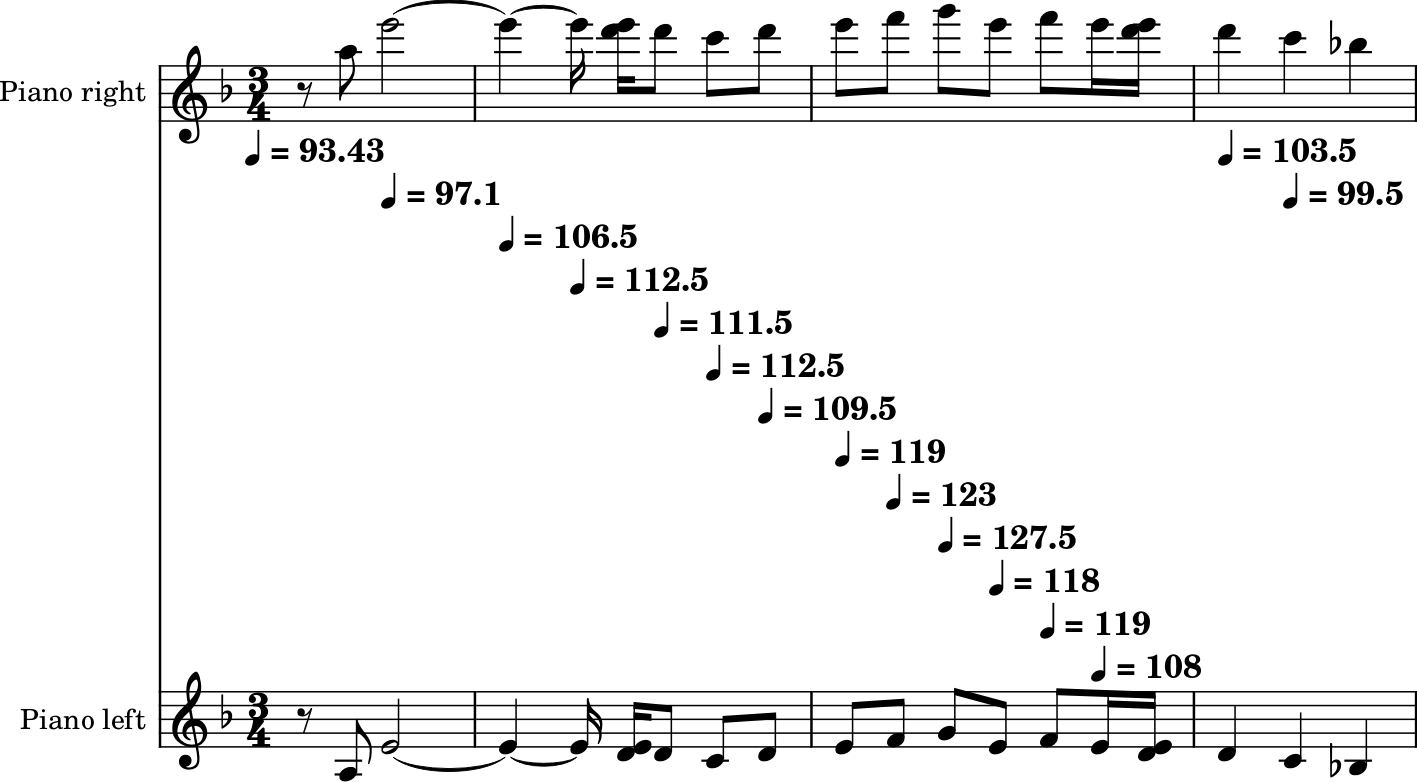

In [3]:
a = converter.parse('small_piano_data/alb_esp1.mid')
a.show()

Загружаем все музыкальные файлы

In [3]:
midif = []
for file in glob.glob("cello/*.mid"):
    print(file)
    try:
        midi = converter.parse(file).chordify()
        midif.append(midi)
    except KeyError:
        problem_files.append(file)

cello\cs1-1pre.mid
cello\cs1-2all.mid
cello\cs1-3cou.mid
cello\cs1-4sar.mid
cello\cs1-5men.mid
cello\cs1-6gig.mid
cello\cs2-1pre.mid
cello\cs2-2all.mid
cello\cs2-3cou.mid
cello\cs2-4sar.mid
cello\cs2-5men.mid
cello\cs2-6gig.mid
cello\cs3-1pre.mid
cello\cs3-2all.mid
cello\cs3-3cou.mid
cello\cs3-4sar.mid
cello\cs3-5bou.mid
cello\cs3-6gig.mid
cello\cs4-1pre.mid
cello\cs4-2all.mid
cello\cs4-3cou.mid
cello\cs4-4sar.mid
cello\cs4-5bou.mid
cello\cs4-6gig.mid
cello\cs5-1pre.mid
cello\cs5-2all.mid
cello\cs5-3cou.mid
cello\cs5-4sar.mid
cello\cs5-5gav.mid
cello\cs5-6gig.mid
cello\cs6-1pre.mid
cello\cs6-2all.mid
cello\cs6-3cou.mid
cello\cs6-4sar.mid
cello\cs6-5gav.mid
cello\cs6-6gig.mid


Создаем списки нот и длительностей по всем произведениям,возьмем длительность последовательностей в 32 ноты. 

In [68]:
seq_len = 32
notes = []
durations = []
data = []

for midi in midif:
    notes = []
    durations = []
    notes_to_parse = midi.flat.notes
    ## для каждого трека добавляем индикатор старта
    notes.extend(['<START>']*seq_len)
    durations.extend(['<START>']*seq_len)
    ##добавляем в списки ноты и длительности
    for element in notes_to_parse:
        if isinstance(element, note.Note): ##если это нота то добавляем высоту в строковом формате
            if element.isRest:
                notes.append(str(element.name))
                durations.append(element.duration.quarterLength)
            else:
                notes.append(str(element.nameWithOctave))
            
                durations.append(element.duration.quarterLength)
        elif isinstance(element, chord.Chord):##если это аккорд, то добавляем информацию как из аккорда
            notes.append('.'.join(str(n) for n in element.pitches))
            durations.append(element.duration.quarterLength)
    ##общий массив данных
    data.append([notes,durations])

In [69]:
midis = data

Сохраняем

In [104]:
import pickle
with open("cello_model/all_notes", "wb") as fp:   
    pickle.dump(all_notes, fp)
with open("cello_model/all_durs", "wb") as fp:   
    pickle.dump(all_durs, fp)
with open("cello_model/midis", "wb") as fp:   
    pickle.dump(midis, fp)

Загружаем

In [4]:
import pickle
with open("cello_model/all_notes", "rb") as fp:   
    all_notes = pickle.load(fp)
with open("cello_model/all_durs", "rb") as fp:   
    all_durs = pickle.load(fp)
with open("cello_model/midis", "rb") as fp:   
    midis = pickle.load(fp)

Множества всех нот и длительностей

In [16]:
seq_len = 32
all_notes = set()
all_durs = set()
for elem in midis:
    all_notes.update(elem[0])
    all_durs.update(elem[1])

In [17]:
all_notes

{'<START>',
 'A2',
 'A2.A3',
 'A2.B-3',
 'A2.B2',
 'A2.C3',
 'A2.D3',
 'A2.E-3',
 'A2.E3',
 'A2.E3.A3',
 'A2.E3.C#4',
 'A2.E3.C#4.A4',
 'A2.E3.C#4.E4',
 'A2.E3.C#4.G#4',
 'A2.E3.C4',
 'A2.E3.D4',
 'A2.F#3',
 'A2.F#3.C4',
 'A2.F#3.D4',
 'A2.F#3.D4.A4',
 'A2.F#3.D4.E4',
 'A2.F#3.D4.F#4',
 'A2.F#4',
 'A2.F3',
 'A2.F3.C4',
 'A2.F3.D4',
 'A2.F3.D4.A4',
 'A2.G3',
 'A2.G3.C#4',
 'A2.G3.D4',
 'A3',
 'A3.B-3',
 'A3.B3',
 'A3.B3.C#4',
 'A3.B3.C#4.D4',
 'A3.B3.C4',
 'A3.C#4',
 'A3.C#4.E4',
 'A3.C4',
 'A3.D4',
 'A3.E4',
 'A3.E4.F#4',
 'A3.E4.G4',
 'A3.F#4',
 'A3.F#4.G4',
 'A3.F4',
 'A3.G4',
 'A4',
 'A4.B4',
 'B-2',
 'B-2.A3',
 'B-2.B-3',
 'B-2.C3',
 'B-2.D3',
 'B-2.D3.A3',
 'B-2.D3.E-3.G#3',
 'B-2.D3.G#3',
 'B-2.E-3',
 'B-2.E3',
 'B-2.E3.D4',
 'B-2.F#3.C#4.E4',
 'B-2.F3',
 'B-2.F3.C4',
 'B-2.F3.D4',
 'B-2.F3.E-4',
 'B-2.G#3',
 'B-2.G3',
 'B-2.G3.D4',
 'B-3',
 'B-3.B3.E4',
 'B-3.C4',
 'B-4',
 'B-4.B4.C#5.D5',
 'B2',
 'B2.A3',
 'B2.C#3',
 'B2.C3',
 'B2.C3.D3',
 'B2.D3',
 'B2.D3.B3.F#4',
 'B2.E-3',
 

In [18]:
all_durs

{0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 Fraction(1, 12),
 Fraction(1, 3),
 Fraction(1, 6),
 2.0,
 2.5,
 Fraction(2, 3),
 3.0,
 4.0,
 Fraction(4, 3),
 '<START>'}

In [19]:
len(all_notes)

470

In [20]:
len(all_durs)

17

Мэппинг нотам и длительностям целых чисел

In [21]:
note_to_int = dict((lnote, number) for number, lnote in enumerate(all_notes))

In [22]:
dur_to_int = dict((dur, number) for number, dur in enumerate(all_durs))

Создание датасета

In [23]:
import numpy as np

Для каждой последовательности ожидаемое сгенерированное значение - следующая нота и ее длительность

In [24]:
X_note = []
X_dur = []
Y_note = []
Y_dur = []
for nd in midis:
    for i in range(0,len(nd[0])-seq_len):
        for lnote,dur in zip(nd[0][i:i+seq_len],nd[1][i:i+seq_len]):
            X_note.append(note_to_int[lnote])
            X_dur.append(dur_to_int[dur])
        Y_note.append(note_to_int[nd[0][i+seq_len]])
        Y_dur.append(dur_to_int[nd[1][i+seq_len]])

In [25]:
#обучающие данные для нот
X_note = np.array(X_note).astype('float32').reshape((-1, seq_len,1))
X_note.shape

(27418, 32, 1)

In [26]:
#обучающие данные для длительностей
X_dur = np.array(X_dur).astype('float32').reshape((-1, seq_len,1))
X_dur.shape

(27418, 32, 1)

In [27]:
#лейблы нот
Y_note = np.array(Y_note).astype('float32').reshape(-1,1)
Y_note.shape

(27418, 1)

In [28]:
#лейблы длительностей
Y_dur = np.array(Y_dur).astype('float32').reshape(-1,1)
Y_dur.shape

(27418, 1)

Архитектура модели

In [29]:
from keras.layers import (Input, Embedding, Concatenate, LSTM, Dense, Reshape, 
                          Activation, Permute, Multiply, Lambda, Dropout, RepeatVector)
from keras.models import Model
from keras.optimizers import RMSprop,Adam
import keras.backend as K

In [30]:
notes_in = Input(shape = (None,))
durations_in = Input(shape = (None,))
x1 = Embedding(len(all_notes), 100)(notes_in)
x2 = Embedding(len(all_durs), 100)(durations_in)
x = Concatenate()([x1,x2]) 
x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.3)(x)
e = Dense(1, activation='tanh')(x)
##механизм внимания
e = Reshape([-1])(e)
alpha = Activation('softmax')(e)
c = Permute([2, 1])(RepeatVector(256)(alpha))
c = Multiply()([x, c])
c = Lambda(lambda xin: K.sum(xin, axis=1), output_shape=(256,))(c)
#выходной слой
notes_out = Dense(len(all_notes), activation = 'softmax', name = 'pitch')(c)
durations_out = Dense(len(all_durs), activation = 'softmax', name = 'duration')(c)
model = Model([notes_in, durations_in], [notes_out, durations_out])
#модель только для рассмотрения работы механизма внимания
att_model = Model([notes_in, durations_in], alpha)
opti = Adam(learning_rate = 0.001)
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'],
optimizer=opti)

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    47000       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 100)    1700        ['input_2[0][0]']                
                                                                                              

In [32]:
from keras.callbacks import ModelCheckpoint

In [33]:
filepath = "big_lstm_cello.hdf5"
checkpoint = ModelCheckpoint(
    filepath, monitor='loss', 
    verbose=2,        
    save_best_only=True,        
    mode='min'
)

In [34]:
from keras.utils import to_categorical

Преобразовываем выходные значения к категориальным

In [35]:
Y_note_cat = to_categorical(Y_note, len(all_notes))
Y_dur_cat = to_categorical(Y_dur, len(all_durs))

Процесс обучения

In [88]:
callbacks_list = [checkpoint]     
model.fit([X_note, X_dur],[Y_note_cat, Y_dur_cat],epochs = 100, batch_size=64,
          validation_split = 0.1,shuffle = True, callbacks=callbacks_list)

Epoch 1/100
386/386 [==============================] - ETA: 0s - loss: 4.3809 - pitch_loss: 3.6153 - duration_loss: 0.7655
Epoch 1: loss improved from inf to 4.38086, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 14s 27ms/step - loss: 4.3809 - pitch_loss: 3.6153 - duration_loss: 0.7655 - val_loss: 6.0683 - val_pitch_loss: 5.0486 - val_duration_loss: 1.0198
Epoch 2/100
386/386 [==============================] - ETA: 0s - loss: 3.9736 - pitch_loss: 3.3334 - duration_loss: 0.6402
Epoch 2: loss improved from 4.38086 to 3.97360, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 9s 25ms/step - loss: 3.9736 - pitch_loss: 3.3334 - duration_loss: 0.6402 - val_loss: 5.7336 - val_pitch_loss: 4.6688 - val_duration_loss: 1.0648
Epoch 3/100
384/386 [============================>.] - ETA: 0s - loss: 3.8117 - pitch_loss: 3.2304 - duration_loss: 0.5813
Epoch 3: loss improved from 3.97360 to 3.81194, saving model to big_lstm_cello.hdf5
386/38

Epoch 22/100
384/386 [============================>.] - ETA: 0s - loss: 1.7673 - pitch_loss: 1.5979 - duration_loss: 0.1694
Epoch 22: loss improved from 1.86669 to 1.76784, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 10s 25ms/step - loss: 1.7678 - pitch_loss: 1.5983 - duration_loss: 0.1695 - val_loss: 7.7365 - val_pitch_loss: 6.3758 - val_duration_loss: 1.3607
Epoch 23/100
384/386 [============================>.] - ETA: 0s - loss: 1.6883 - pitch_loss: 1.5309 - duration_loss: 0.1574
Epoch 23: loss improved from 1.76784 to 1.68811, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 9s 24ms/step - loss: 1.6881 - pitch_loss: 1.5308 - duration_loss: 0.1573 - val_loss: 8.0748 - val_pitch_loss: 6.5993 - val_duration_loss: 1.4754
Epoch 24/100
384/386 [============================>.] - ETA: 0s - loss: 1.6127 - pitch_loss: 1.4614 - duration_loss: 0.1513
Epoch 24: loss improved from 1.68811 to 1.61226, saving model to big_lstm_cello.h

Epoch 43/100
385/386 [============================>.] - ETA: 0s - loss: 0.6642 - pitch_loss: 0.5993 - duration_loss: 0.0650
Epoch 43: loss improved from 0.69539 to 0.66412, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 10s 25ms/step - loss: 0.6641 - pitch_loss: 0.5992 - duration_loss: 0.0649 - val_loss: 10.6075 - val_pitch_loss: 8.5067 - val_duration_loss: 2.1007
Epoch 44/100
384/386 [============================>.] - ETA: 0s - loss: 0.6154 - pitch_loss: 0.5563 - duration_loss: 0.0591
Epoch 44: loss improved from 0.66412 to 0.61547, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 10s 25ms/step - loss: 0.6155 - pitch_loss: 0.5564 - duration_loss: 0.0590 - val_loss: 10.4634 - val_pitch_loss: 8.4292 - val_duration_loss: 2.0342
Epoch 45/100
385/386 [============================>.] - ETA: 0s - loss: 0.6042 - pitch_loss: 0.5428 - duration_loss: 0.0614
Epoch 45: loss improved from 0.61547 to 0.60395, saving model to big_lstm_cell

Epoch 64/100
384/386 [============================>.] - ETA: 0s - loss: 0.3582 - pitch_loss: 0.3133 - duration_loss: 0.0449
Epoch 64: loss improved from 0.38976 to 0.35828, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 10s 25ms/step - loss: 0.3583 - pitch_loss: 0.3134 - duration_loss: 0.0449 - val_loss: 12.0449 - val_pitch_loss: 9.5038 - val_duration_loss: 2.5411
Epoch 65/100
384/386 [============================>.] - ETA: 0s - loss: 0.3637 - pitch_loss: 0.3190 - duration_loss: 0.0447
Epoch 65: loss did not improve from 0.35828
386/386 [==============================] - 10s 25ms/step - loss: 0.3642 - pitch_loss: 0.3195 - duration_loss: 0.0447 - val_loss: 12.0228 - val_pitch_loss: 9.5601 - val_duration_loss: 2.4627
Epoch 66/100
385/386 [============================>.] - ETA: 0s - loss: 0.3701 - pitch_loss: 0.3231 - duration_loss: 0.0470
Epoch 66: loss did not improve from 0.35828
386/386 [==============================] - 10s 25ms/step - loss: 0.3703 - p

Epoch 86/100
385/386 [============================>.] - ETA: 0s - loss: 0.3166 - pitch_loss: 0.2715 - duration_loss: 0.0451
Epoch 86: loss did not improve from 0.27812
386/386 [==============================] - 10s 26ms/step - loss: 0.3166 - pitch_loss: 0.2716 - duration_loss: 0.0451 - val_loss: 12.7270 - val_pitch_loss: 10.2622 - val_duration_loss: 2.4648
Epoch 87/100
384/386 [============================>.] - ETA: 0s - loss: 0.2913 - pitch_loss: 0.2514 - duration_loss: 0.0400
Epoch 87: loss did not improve from 0.27812
386/386 [==============================] - 9s 24ms/step - loss: 0.2910 - pitch_loss: 0.2511 - duration_loss: 0.0399 - val_loss: 12.6165 - val_pitch_loss: 10.1078 - val_duration_loss: 2.5087
Epoch 88/100
384/386 [============================>.] - ETA: 0s - loss: 0.2757 - pitch_loss: 0.2365 - duration_loss: 0.0392
Epoch 88: loss improved from 0.27812 to 0.27580, saving model to big_lstm_cello.hdf5
386/386 [==============================] - 10s 26ms/step - loss: 0.2758 - 

In [89]:
callbacks_list = [checkpoint]     
model.fit([X_note, X_dur],[Y_note_cat, Y_dur_cat],epochs = 50, batch_size=64,
          validation_split = 0.1,shuffle = True, callbacks=callbacks_list)

Epoch 1/50
384/386 [============================>.] - ETA: 0s - loss: 0.2566 - pitch_loss: 0.2196 - duration_loss: 0.0370
Epoch 1: loss did not improve from 0.24582
386/386 [==============================] - 10s 25ms/step - loss: 0.2569 - pitch_loss: 0.2197 - duration_loss: 0.0372 - val_loss: 13.5410 - val_pitch_loss: 10.6367 - val_duration_loss: 2.9043
Epoch 2/50
384/386 [============================>.] - ETA: 0s - loss: 0.2702 - pitch_loss: 0.2314 - duration_loss: 0.0388
Epoch 2: loss did not improve from 0.24582
386/386 [==============================] - 9s 24ms/step - loss: 0.2705 - pitch_loss: 0.2316 - duration_loss: 0.0389 - val_loss: 13.4238 - val_pitch_loss: 10.5602 - val_duration_loss: 2.8636
Epoch 3/50
386/386 [==============================] - ETA: 0s - loss: 0.2595 - pitch_loss: 0.2218 - duration_loss: 0.0377
Epoch 3: loss did not improve from 0.24582
386/386 [==============================] - 9s 23ms/step - loss: 0.2595 - pitch_loss: 0.2218 - duration_loss: 0.0377 - val_lo

386/386 [==============================] - 10s 25ms/step - loss: 0.2287 - pitch_loss: 0.1953 - duration_loss: 0.0334 - val_loss: 13.7140 - val_pitch_loss: 10.8497 - val_duration_loss: 2.8643
Epoch 46/50
384/386 [============================>.] - ETA: 0s - loss: 0.2395 - pitch_loss: 0.2029 - duration_loss: 0.0366
Epoch 46: loss did not improve from 0.20111
386/386 [==============================] - 10s 25ms/step - loss: 0.2401 - pitch_loss: 0.2034 - duration_loss: 0.0368 - val_loss: 14.2127 - val_pitch_loss: 11.1693 - val_duration_loss: 3.0434
Epoch 47/50
385/386 [============================>.] - ETA: 0s - loss: 0.2381 - pitch_loss: 0.2036 - duration_loss: 0.0345
Epoch 47: loss did not improve from 0.20111
386/386 [==============================] - 9s 25ms/step - loss: 0.2380 - pitch_loss: 0.2035 - duration_loss: 0.0345 - val_loss: 13.6506 - val_pitch_loss: 10.9343 - val_duration_loss: 2.7163
Epoch 48/50
385/386 [============================>.] - ETA: 0s - loss: 0.2035 - pitch_loss: 0.

In [36]:
model.load_weights('big_lstm_cello.hdf5')

Словари для декодирования целых чисел в ноты и длительности

In [37]:
int_to_note = {y: x for x, y in note_to_int.items()}
int_to_dur = {y: x for x, y in dur_to_int.items()}

Функция предсказания с температурой(для решения проблемы детерминированных предсказаний)

In [38]:
def pred_with_temp(pred,temperature):
    if temperature == 0:
        return np.argmax(pred)
    else:
        preds = np.log(pred) / temperature
        exp_pred = np.exp(pred)
        preds = exp_pred / np.sum(exp_pred)
        return np.random.choice(len(pred), p=pred)

Функция для генерации примеров

In [39]:
def generate_sample(seq_len,temp_score=0.3):
    fnote = note_to_int['<START>']
    fdur = dur_to_int['<START>']

    temperature = 0.3

    #создаем входные последовательности из токенов старта
    note_seq = [fnote]*seq_len
    dur_seq = [fdur]*seq_len
    note_seq = np.array(note_seq).reshape(1,-1)
    dur_seq = np.array(dur_seq).reshape(1,-1)
    
    new_note = 0
    new_dur = 0
    i = 32
    pred_seq_note = note_seq
    pred_seq_dur = dur_seq
    #процесс создания последовательностей предсказаний модели (длиной 500)
    while note_seq.shape[1]!= 500+seq_len and new_note!=note_to_int['<START>'] and new_dur!=dur_to_int['<START>']:
        
        new_note, new_dur =  model.predict([pred_seq_note, pred_seq_dur],verbose=0)
        new_note = pred_with_temp(new_note[0],temperature)
        new_dur = pred_with_temp(new_dur[0],temperature)
        i+=1
        note_seq = np.append(note_seq,[[new_note]], axis= 1)
        dur_seq = np.append(dur_seq,[[new_dur]], axis= 1)
        note_seq = np.array(note_seq).reshape(1,-1)
        dur_seq = np.array(dur_seq).reshape(1,-1)
        pred_seq_note = note_seq[:,i-32:i]
        pred_seq_dur = dur_seq[:,i-32:i]
    note_text_seq = []
    dur_text_seq = []
    #декодируем
    for i in range(0,len(note_seq[0])):
        note_text_seq.append(int_to_note[note_seq[0][i]])
        dur_text_seq.append(int_to_dur[dur_seq[0][i]])

    return note_text_seq, dur_text_seq

Функция для создания самих midi-файлов

In [40]:

def create_midi(note_text_seq, dur_text_seq):
    midi_stream = stream.Stream()
    for note_pattern, duration_pattern in zip(note_text_seq, dur_text_seq):
        # pattern is a chord
        if ('.' in note_pattern):
            notes_in_chord = note_pattern.split('.')
            chord_notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(current_note)
                new_note.duration = duration.Duration(duration_pattern)
                new_note.storedInstrument = instrument.Violoncello()
                chord_notes.append(new_note)
            new_chord = chord.Chord(chord_notes)
            midi_stream.append(new_chord)
        elif note_pattern == 'rest':
        # pattern is a rest
            new_note = note.Rest()
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            midi_stream.append(new_note)
        elif note_pattern != '<START>':
        # pattern is a note
            new_note = note.Note(note_pattern)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            midi_stream.append(new_note)
    return midi_stream

Генерируем выходные семплы

In [41]:
for i in range(5):
    n,d = generate_sample(seq_len)
    midi_result = create_midi(n,d)
    midi_result.write('midi',fp = f'cello_out{i}.mid')

KeyboardInterrupt: 